In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

#-- plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#--

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(r"AML_Final\data\ML_Project"))

# Any results you write to the current directory are saved as output.

: 

In [5]:
data = pd.read_csv(r'\AML_Final\data\mw1.csv')

> **Data Discovery & Visualization**

In [6]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        403 non-null    int64  
 1   BRANCH_COUNT                     403 non-null    int64  
 2   CALL_PAIRS                       403 non-null    int64  
 3   LOC_CODE_AND_COMMENT             403 non-null    int64  
 4   LOC_COMMENTS                     403 non-null    int64  
 5   CONDITION_COUNT                  403 non-null    int64  
 6   CYCLOMATIC_COMPLEXITY            403 non-null    int64  
 7   CYCLOMATIC_DENSITY               403 non-null    float64
 8   DECISION_COUNT                   403 non-null    int64  
 9   DECISION_DENSITY                 403 non-null    float64
 10  DESIGN_COMPLEXITY                403 non-null    int64  
 11  DESIGN_DENSITY                   403 non-null    float64
 12  EDGE_COUNT            

In [7]:
data.head() #shows first 5 rows

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
0,2,1,0,0,3,0,1,0.17,0,0.0,...,2,0.08,9,13,5,6,12,33.33,6,False
1,3,5,4,0,4,8,3,0.25,4,2.0,...,10,0.15,25,36,18,10,20,25.00,12,False
2,4,11,2,0,8,20,6,0.30,10,2.0,...,20,0.18,33,49,17,19,33,28.57,20,False
3,2,7,4,0,1,12,4,0.25,6,2.0,...,17,0.20,18,24,13,6,20,5.88,16,False
4,1,1,3,0,4,0,1,0.14,0,0.0,...,7,0.08,18,19,13,5,13,36.36,7,False


In [8]:
data.tail() #shows last 5 rows

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
398,5,9,2,3,0,0,8,0.44,0,0.0,...,13,0.33,22,40,17,15,24,16.67,18,False
399,1,6,3,0,0,0,5,0.50,0,0.0,...,9,0.42,15,29,13,11,12,0.00,10,False
400,3,3,2,0,3,4,2,0.29,2,2.0,...,7,0.14,12,16,8,12,14,30.00,7,False
401,5,3,5,0,2,4,2,0.20,2,2.0,...,10,0.11,25,26,21,7,18,16.67,10,False
402,4,3,10,0,3,4,2,0.13,2,2.0,...,17,0.08,22,27,17,5,24,15.79,16,False


In [9]:
data.sample(10) #shows random rows (sample(number_of_rows))

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
13,7,3,3,0,21,4,2,0.18,2,2.0,...,10,0.05,21,25,13,11,40,65.63,11,False
328,4,5,0,0,6,8,3,0.33,4,2.0,...,8,0.15,13,18,6,11,20,40.00,9,False
188,5,3,1,0,0,4,2,0.11,2,2.0,...,17,0.08,80,82,21,8,25,0.00,19,False
8,1,3,1,0,1,4,2,0.20,2,2.0,...,7,0.15,9,17,7,12,13,9.09,10,False
394,5,5,2,0,3,8,3,0.20,4,2.0,...,10,0.13,23,29,13,12,24,16.67,15,False
163,4,9,2,2,0,0,8,0.50,0,0.0,...,13,0.38,24,42,18,15,21,12.50,16,False
265,3,7,5,0,4,4,5,0.14,2,2.0,...,17,0.11,51,76,35,19,45,9.76,37,False
173,0,1,0,0,1,0,1,0.33,0,0.0,...,2,0.20,3,6,3,6,5,25.00,3,False
93,4,5,1,0,11,8,3,0.17,4,2.0,...,11,0.09,28,33,16,12,34,37.93,18,False
99,12,5,10,0,4,8,3,0.06,4,2.0,...,20,0.05,59,101,30,14,65,7.69,48,False


In [10]:
data.shape #shows the number of rows and columns

(403, 38)

In [11]:
data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,...,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,4.940447,7.307692,4.302730,0.342432,4.205955,9.250620,4.518610,0.230199,4.099256,1.500496,...,4.709677,16.848635,0.157543,36.640199,46.918114,20.560794,11.320099,30.843672,17.461687,20.697270
std,5.335643,8.276299,4.336891,1.773733,5.558353,13.006092,4.730711,0.119272,5.657740,1.380340,...,6.821285,15.940325,0.092675,39.512918,49.518284,16.743251,6.443344,26.971108,16.063025,18.386607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,0.000000,...,0.000000,2.000000,0.010000,2.000000,3.000000,2.000000,3.000000,4.000000,0.000000,3.000000
25%,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.150000,0.000000,0.000000,...,0.000000,7.000000,0.090000,12.000000,16.000000,8.000000,7.000000,13.000000,5.880000,9.000000
50%,3.000000,5.000000,3.000000,0.000000,2.000000,4.000000,3.000000,0.200000,2.000000,2.000000,...,2.000000,12.000000,0.140000,22.000000,30.000000,15.000000,10.000000,22.000000,15.000000,14.000000
75%,6.500000,9.000000,6.000000,0.000000,5.000000,12.000000,5.500000,0.290000,6.000000,2.000000,...,6.000000,21.000000,0.200000,51.000000,60.000000,29.000000,14.000000,40.000000,25.000000,27.000000
max,34.000000,50.000000,25.000000,16.000000,42.000000,82.000000,28.000000,0.790000,36.000000,11.500000,...,48.000000,110.000000,0.690000,396.000000,493.000000,107.000000,44.000000,171.000000,85.000000,112.000000


In [14]:
defects_true_false = data.groupby('c')['DESIGN_COMPLEXITY'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  372
True :  31


> * **Histogram**

In [17]:
trace = go.Histogram(
    x = data.c,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)


> * **Covariance**

Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

In [18]:
data.corr() #shows coveriance matrix

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c
LOC_BLANK,1.000000,0.698870,0.694479,-0.030958,0.699778,0.663294,0.696799,-0.148322,0.687110,0.229637,...,0.826606,-0.181450,0.757741,0.758550,0.824977,0.655452,0.941784,0.085581,0.879755,0.340481
BRANCH_COUNT,0.698870,1.000000,0.529100,-0.042103,0.449978,0.916591,0.968885,0.336231,0.853694,0.548802,...,0.887397,0.352259,0.643877,0.660780,0.724113,0.662079,0.783613,-0.105039,0.810637,0.294550
CALL_PAIRS,0.694479,0.529100,1.000000,-0.075274,0.386031,0.474943,0.534422,-0.142175,0.495332,0.251383,...,0.713777,-0.114501,0.552939,0.568910,0.742037,0.418920,0.672449,-0.079512,0.668177,0.371098
LOC_CODE_AND_COMMENT,-0.030958,-0.042103,-0.075274,1.000000,0.001912,-0.068212,-0.025960,-0.084394,-0.073793,-0.050474,...,0.018290,-0.049802,0.035055,0.019381,0.059773,-0.052929,0.014069,0.411072,0.029044,0.017791
LOC_COMMENTS,0.699778,0.449978,0.386031,0.001912,1.000000,0.500324,0.397704,-0.139570,0.500694,0.204554,...,0.526126,-0.284800,0.490360,0.468174,0.513429,0.451570,0.731028,0.496552,0.566962,0.341548
CONDITION_COUNT,0.663294,0.916591,0.474943,-0.068212,0.500324,1.000000,0.803687,0.200671,0.969601,0.525134,...,0.857470,0.199151,0.603953,0.581124,0.654838,0.522450,0.743022,-0.061035,0.746198,0.317739
CYCLOMATIC_COMPLEXITY,0.696799,0.968885,0.534422,-0.025960,0.397704,0.803687,1.000000,0.369044,0.753677,0.471787,...,0.850770,0.395435,0.640670,0.684170,0.728762,0.723306,0.771008,-0.125940,0.808549,0.261976
CYCLOMATIC_DENSITY,-0.148322,0.336231,-0.142175,-0.084394,-0.139570,0.200671,0.369044,1.000000,0.123831,0.375924,...,0.040641,0.914225,-0.153864,-0.100858,-0.144128,0.104435,-0.134000,-0.090545,-0.111328,-0.060673
DECISION_COUNT,0.687110,0.853694,0.495332,-0.073793,0.500694,0.969601,0.753677,0.123831,1.000000,0.398132,...,0.845240,0.126948,0.614546,0.595616,0.658374,0.543248,0.752946,-0.071581,0.753732,0.314632
DECISION_DENSITY,0.229637,0.548802,0.251383,-0.050474,0.204554,0.525134,0.471787,0.375924,0.398132,1.000000,...,0.399587,0.367803,0.242434,0.235267,0.313240,0.318037,0.317329,-0.083750,0.337010,0.096420


> * **Heatmap**

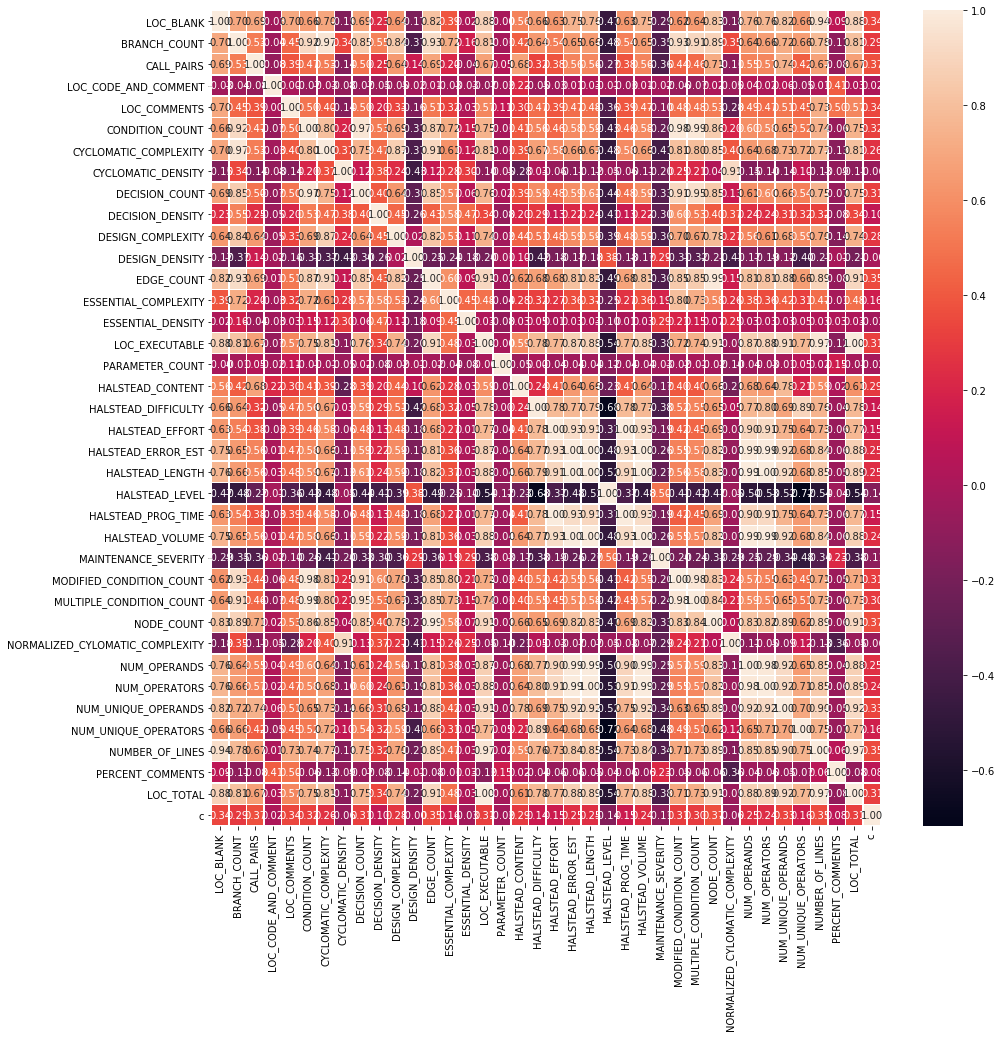

In [19]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

> *The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)*

> *The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)*

> * **Scatter Plot **

In [21]:
trace = go.Scatter(
    x = data.CONDITION_COUNT,
    y = data.DESIGN_COMPLEXITY,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

#two attributes with high correlation v-b > just about 1

> **Data Preprocessing**

In [22]:
data.isnull().sum() #shows how many of the null

LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
M

> *No missing value. *

> *No data cleaning needed because the data is all important.*

>*  **Outlier Detection (Box Plot)**

In [24]:
trace1 = go.Box(
    x = data.NUM_UNIQUE_OPERATORS,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

*Showing all information when clicking on plot (min, max, q1, q2, etc.).*

>*  **Feature Extraction**

In [28]:
def evaluation_control(data):    
    evaluation = (data.LOC_TOTAL < 300) & (data.HALSTEAD_VOLUME < 1000 ) & (data.HALSTEAD_DIFFICULTY < 50) & (data.HALSTEAD_EFFORT < 500000) & (data.HALSTEAD_PROG_TIME < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [29]:
evaluation_control(data)
data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c,complexityEvaluation
0,2,1,0,0,3,0,1,0.17,0,0.0,...,0.08,9,13,5,6,12,33.33,6,False,Succesful
1,3,5,4,0,4,8,3,0.25,4,2.0,...,0.15,25,36,18,10,20,25.00,12,False,Succesful
2,4,11,2,0,8,20,6,0.30,10,2.0,...,0.18,33,49,17,19,33,28.57,20,False,Succesful
3,2,7,4,0,1,12,4,0.25,6,2.0,...,0.20,18,24,13,6,20,5.88,16,False,Succesful
4,1,1,3,0,4,0,1,0.14,0,0.0,...,0.08,18,19,13,5,13,36.36,7,False,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,5,9,2,3,0,0,8,0.44,0,0.0,...,0.33,22,40,17,15,24,16.67,18,False,Succesful
399,1,6,3,0,0,0,5,0.50,0,0.0,...,0.42,15,29,13,11,12,0.00,10,False,Succesful
400,3,3,2,0,3,4,2,0.29,2,2.0,...,0.14,12,16,8,12,14,30.00,7,False,Succesful
401,5,3,5,0,2,4,2,0.20,2,2.0,...,0.11,25,26,21,7,18,16.67,10,False,Succesful


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        403 non-null    int64  
 1   BRANCH_COUNT                     403 non-null    int64  
 2   CALL_PAIRS                       403 non-null    int64  
 3   LOC_CODE_AND_COMMENT             403 non-null    int64  
 4   LOC_COMMENTS                     403 non-null    int64  
 5   CONDITION_COUNT                  403 non-null    int64  
 6   CYCLOMATIC_COMPLEXITY            403 non-null    int64  
 7   CYCLOMATIC_DENSITY               403 non-null    float64
 8   DECISION_COUNT                   403 non-null    int64  
 9   DECISION_DENSITY                 403 non-null    float64
 10  DESIGN_COMPLEXITY                403 non-null    int64  
 11  DESIGN_DENSITY                   403 non-null    float64
 12  EDGE_COUNT            

In [31]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Redesign      54
Succesful    349
dtype: int64

In [32]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

> * **Data Normalization  (Min-Max Normalization)**

In [34]:
from sklearn import preprocessing

scale_v = data[['HALSTEAD_VOLUME']]
scale_b = data[['HALSTEAD_LEVEL']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,c,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,2,1,0,0,3,0,1,0.17,0,0.0,...,13,5,6,12,33.33,6,False,Succesful,0.010453,0.261538
1,3,5,4,0,4,8,3,0.25,4,2.0,...,36,18,10,20,25.00,12,False,Succesful,0.045642,0.184615
2,4,11,2,0,8,20,6,0.30,10,2.0,...,49,17,19,33,28.57,20,False,Succesful,0.066819,0.046154
3,2,7,4,0,1,12,4,0.25,6,2.0,...,24,13,6,20,5.88,16,False,Succesful,0.027031,0.338462
4,1,1,3,0,4,0,1,0.14,0,0.0,...,19,13,5,13,36.36,7,False,Succesful,0.023122,0.415385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,5,9,2,3,0,0,8,0.44,0,0.0,...,40,17,15,24,16.67,18,False,Succesful,0.048356,0.123077
399,1,6,3,0,0,0,5,0.50,0,0.0,...,29,13,11,12,0.00,10,False,Succesful,0.030812,0.215385
400,3,3,2,0,3,4,2,0.29,2,2.0,...,16,8,12,14,30.00,7,False,Succesful,0.017729,0.138462
401,5,3,5,0,2,4,2,0.20,2,2.0,...,26,21,7,18,16.67,10,False,Succesful,0.037852,0.338462


In [37]:
scaled_data = pd.concat([data.HALSTEAD_VOLUME , data.HALSTEAD_LEVEL , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,HALSTEAD_VOLUME,HALSTEAD_LEVEL,v_ScaledUp,b_ScaledUp
0,76.11,0.19,0.010453,0.261538
1,293.25,0.14,0.045642,0.184615
2,423.93,0.05,0.066819,0.046154
3,178.41,0.24,0.027031,0.338462
4,154.29,0.29,0.023122,0.415385
...,...,...,...,...
398,310.00,0.10,0.048356,0.123077
399,201.74,0.16,0.030812,0.215385
400,121.01,0.11,0.017729,0.138462
401,245.18,0.24,0.037852,0.338462


>**Model Selection**

>* **Naive Bayes**

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        403 non-null    int64  
 1   BRANCH_COUNT                     403 non-null    int64  
 2   CALL_PAIRS                       403 non-null    int64  
 3   LOC_CODE_AND_COMMENT             403 non-null    int64  
 4   LOC_COMMENTS                     403 non-null    int64  
 5   CONDITION_COUNT                  403 non-null    int64  
 6   CYCLOMATIC_COMPLEXITY            403 non-null    int64  
 7   CYCLOMATIC_DENSITY               403 non-null    float64
 8   DECISION_COUNT                   403 non-null    int64  
 9   DECISION_DENSITY                 403 non-null    float64
 10  DESIGN_COMPLEXITY                403 non-null    int64  
 11  DESIGN_DENSITY                   403 non-null    float64
 12  EDGE_COUNT            

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [40]:
Y

array(['Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Redesign', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Succesful',
       'Succesful', 'Succesful', 'Redesign', 'Redesign', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',

In [41]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [42]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [44]:
#Calculation of ACC value by K-fold cross validation of NB model
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10, random_state = seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

C:\Users\Srujan Vithalani\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [45]:
cv_results

array([0.96969697, 0.93939394, 0.90625   , 0.90625   , 0.9375    ,
       1.        , 0.875     , 0.9375    , 0.96875   , 0.9375    ])

In [46]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 0.937784 - Std : (0.034324)'

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       0.86      1.00      0.92        12
   Succesful       1.00      0.97      0.99        69

    accuracy                           0.98        81
   macro avg       0.93      0.99      0.95        81
weighted avg       0.98      0.98      0.98        81

[[12  0]
 [ 2 67]]
ACC:  0.9753086419753086


> * **Linear Regression**

In [49]:
    sel_loc = data['LOC_BLANK']
    sel_b = data['HALSTEAD_LEVEL']
    selected_data = pd.concat([sel_loc, sel_b], axis=1)
    selected_data
    #data selected for selection

,LOC_BLANK,HALSTEAD_LEVEL
0,2,0.19
1,3,0.14
2,4,0.05
3,2,0.24
4,1,0.29
...,...,...
398,5,0.10
399,1,0.16
400,3,0.11
401,5,0.24


In [50]:
selected_data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,HALSTEAD_LEVEL
count,403.000000,403.000000
mean,4.940447,0.173573
std,5.335643,0.134485
min,0.000000,0.020000
25%,2.000000,0.080000
50%,3.000000,0.130000
75%,6.500000,0.220000
max,34.000000,0.670000


In [51]:
selected_data.corr() #shows coveriance matrix

,LOC_BLANK,HALSTEAD_LEVEL
LOC_BLANK,1.000000,-0.468224
HALSTEAD_LEVEL,-0.468224,1.000000


In [53]:
#Scatter Plot
trace = go.Scatter(
    x = data['LOC_BLANK'],
    y = data.HALSTEAD_LEVEL,
    mode = "markers",
    name = "Line of Code - Bug",
    marker = dict(color = 'darkmagenta'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Line of Code - Bug',
              xaxis = dict(title = 'Line of Code', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [55]:
Y = selected_data['HALSTEAD_LEVEL'].values  
X = selected_data['LOC_BLANK'].values  
X = X.reshape(-1,1)
#Select the X and Y values for selection
Y

array([0.19, 0.14, 0.05, 0.24, 0.29, 0.16, 0.04, 0.27, 0.13, 0.04, 0.06,
       0.14, 0.16, 0.11, 0.18, 0.08, 0.16, 0.13, 0.29, 0.06, 0.44, 0.19,
       0.16, 0.39, 0.09, 0.11, 0.19, 0.27, 0.36, 0.41, 0.08, 0.13, 0.07,
       0.15, 0.17, 0.14, 0.07, 0.03, 0.5 , 0.1 , 0.13, 0.09, 0.18, 0.17,
       0.57, 0.24, 0.16, 0.17, 0.06, 0.05, 0.12, 0.17, 0.29, 0.03, 0.24,
       0.06, 0.19, 0.04, 0.04, 0.11, 0.09, 0.08, 0.43, 0.05, 0.18, 0.06,
       0.09, 0.25, 0.08, 0.1 , 0.22, 0.04, 0.13, 0.11, 0.19, 0.18, 0.29,
       0.13, 0.34, 0.18, 0.04, 0.14, 0.21, 0.36, 0.29, 0.09, 0.04, 0.41,
       0.11, 0.05, 0.11, 0.06, 0.03, 0.1 , 0.1 , 0.07, 0.18, 0.05, 0.18,
       0.07, 0.27, 0.1 , 0.12, 0.33, 0.2 , 0.24, 0.19, 0.67, 0.04, 0.03,
       0.19, 0.44, 0.04, 0.16, 0.08, 0.04, 0.25, 0.15, 0.15, 0.67, 0.16,
       0.22, 0.06, 0.19, 0.11, 0.04, 0.29, 0.14, 0.08, 0.27, 0.14, 0.21,
       0.33, 0.33, 0.67, 0.05, 0.05, 0.11, 0.21, 0.15, 0.02, 0.1 , 0.07,
       0.22, 0.13, 0.22, 0.15, 0.2 , 0.06, 0.5 , 0.

In [56]:
#Parsing selection and verification datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [57]:
#Creation of Linear Regression model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Intercept & Coef
print("Intercept :", model.intercept_)  
print("Coef :", model.coef_)

Intercept : 0.23180648151683983
Coef : [-0.011443]


In [59]:
X_test

array([[ 0],
       [16],
       [ 0],
       [ 2],
       [ 2],
       [15],
       [ 4],
       [14],
       [ 7],
       [ 5],
       [10],
       [ 6],
       [ 4],
       [16],
       [ 1],
       [ 0],
       [ 2],
       [10],
       [21],
       [ 0],
       [ 3],
       [ 2],
       [ 9],
       [ 0],
       [ 4],
       [ 0],
       [ 7],
       [ 2],
       [ 2],
       [11],
       [ 5],
       [ 8],
       [ 0],
       [ 9],
       [ 0],
       [ 0],
       [ 5],
       [10],
       [ 2],
       [ 6],
       [ 2],
       [ 5],
       [ 4],
       [11],
       [ 3],
       [ 4],
       [ 6],
       [ 4],
       [ 3],
       [ 3],
       [ 1],
       [17],
       [ 1],
       [ 1],
       [ 3],
       [ 4],
       [ 2],
       [ 3],
       [ 2],
       [ 5],
       [ 2],
       [ 2],
       [ 5],
       [ 1],
       [ 1],
       [25],
       [ 1],
       [ 5],
       [ 5],
       [ 1],
       [ 6],
       [ 9],
       [ 0],
       [ 2],
       [ 4],
       [ 3],
       [ 0],

In [60]:
y_pred = model.predict(X_test) 

In [61]:
# New data (real , estimated)
new_data = pd.DataFrame({'real': y_test, 'estimated': y_pred})  
new_data

,real,estimated
0,0.24,0.231806
1,0.13,0.048718
2,0.11,0.231806
3,0.34,0.208920
4,0.06,0.208920
...,...,...
76,0.44,0.231806
77,0.16,0.174591
78,0.18,0.197477
79,0.11,0.208920


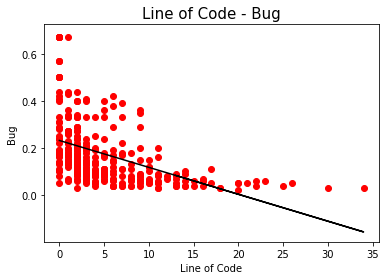

In [62]:
#The nearest line of all values in the model
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = model.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'black')
plt.title('Line of Code - Bug', size = 15)  
plt.xlabel('Line of Code')  
plt.ylabel('Bug')  
plt.show() 

In [63]:
#The results of the model. (This uses the Least squares method and the Root mean square error methods)
#In general, as these values are calculated as the mean value and the difference difference, it is considered that the model has better estimation ability as it approaches 0.
from sklearn import metrics   
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Squared Error (MSE): 0.012125367020013711
Root Mean Squared Error (RMSE): 0.11011524426714818


>*When we look at the values, the fact that the values are close to zero shows us that the model has good predictive ability.*

*- THE END -*

In [1]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [16]:
import numpy as np
from pandas import read_csv
df = read_csv('mw1.csv', dtype = {'column_name_1': np.float64, 'column_name_2': np.float64,})
data = df.values
X, y = data[:, :-1], data[:, -1]
y=y.astype('int')
print(X.shape, y.shape)

(403, 37) (403,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9259259259259259


In [34]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)



# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9135802469135802


In [46]:
import numpy as np
from pandas import read_csv
df = read_csv('mw1.csv', dtype = {'column_name_1': np.float64, 'column_name_2': np.float64,})
data = df.values
X, y = data[:, :-1], data[:, -1]
y=y.astype('int')
print(X.shape, y.shape)

(403, 37) (403,)


In [47]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.919 (0.025)


In [53]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

import numpy as np
from pandas import read_csv
# get the dataset
def get_dataset():
    df = read_csv('mw1.csv', dtype = {'column_name_1': np.float64, 'column_name_2': np.float64,})
    data = df.values
    X, y = data[:, :-1], data[:, -1]
    y=y.astype('int')
    return X, y

In [54]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models

In [55]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [56]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

In [57]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.1 0.919 (0.019)
>0.2 0.917 (0.025)
>0.3 0.920 (0.022)
>0.4 0.921 (0.026)
>0.5 0.923 (0.026)
>0.6 0.921 (0.026)
>0.7 0.921 (0.025)
>0.8 0.921 (0.027)
>0.9 0.917 (0.023)
>1.0 0.917 (0.024)


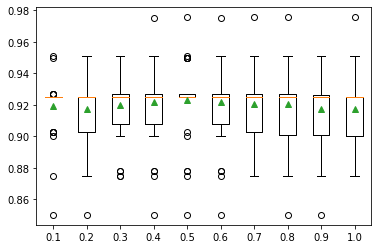

In [58]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [79]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot

In [80]:
import numpy as np
from pandas import read_csv
# get the dataset
def get_dataset():
    df = read_csv('mw1.csv', dtype = {'column_name_1': np.float64, 'column_name_2': np.float64,})
    data = df.values
    X, y = data[:, :-1], data[:, -1]
    y=y.astype('int')
    return X, y

In [81]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models

In [82]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [83]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

In [84]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.913 (0.029)
>50 0.915 (0.026)
>100 0.913 (0.030)
>500 0.916 (0.028)
>1000 0.915 (0.025)
>5000 0.916 (0.026)


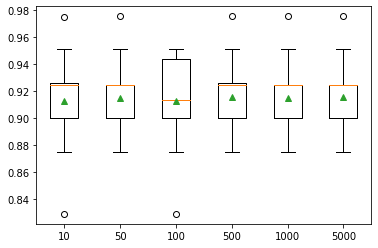

In [85]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()